## **DATASET**

In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [51]:
#Data of 28*28 sized images from 0-9 characters...
mnist = keras.datasets.mnist.load_data()

In [52]:
(x_train, y_train) , (x_test, y_test)= keras.datasets.mnist.load_data()

len(x_train)
# x_train contain 60000 training images

len(x_test)
# x_test contain 10000 testing images

10000

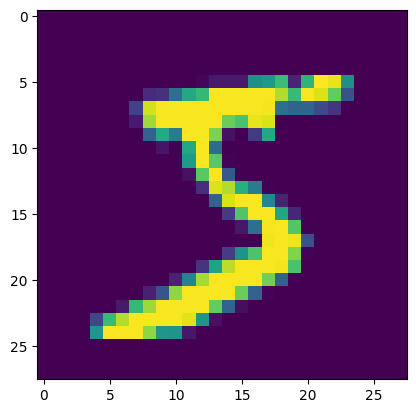

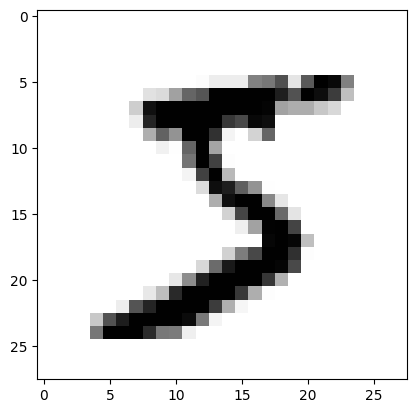

In [53]:
#Sample image from the data
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], plt.cm.binary)

**Sample image**

In [54]:
x_train[0].shape

(28, 28)

In [55]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [56]:
y_train[0]

5

# **PREPROCESSING THE DATA**

-Preprocessing in data analysis and machine learning involves cleaning, transforming, and preparing raw data to make it suitable for modeling, improving its quality and usability.

In [57]:
# Normalize pixel values to be between 0 and 1
x_train = tf.keras.utils.normalize(x_train , axis=1)
x_test  =  tf.keras.utils.normalize(x_test , axis=1)

In [58]:
# One-hot encode labels(assigns integer values to categorical labels or classes)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [59]:
# Reshaping the data to have a single channel
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [60]:
print(x_train_flattened.shape) #784 is indeed = 28*28

(60000, 784)


In [61]:
print(x_test_flattened.shape)

(10000, 784)


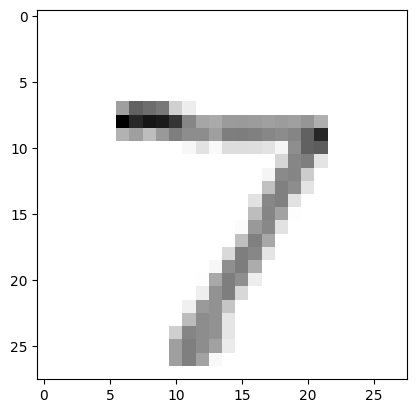

In [62]:
plt.imshow(x_test[0],cmap = plt.cm.binary)
plt.show()

# **APPLYING ANN MODEL :**

-An Artificial Neural Network (ANN) is a computer system that tries to mimic the way humans learn and make decisions, allowing it to recognize patterns, make predictions, and solve complex problems.






In [63]:
#Built ANN model
from keras.models import Sequential
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [64]:
#Model Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
#Model Training
model.fit(x_train , y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3529 - accuracy: 0.9009
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1720 - accuracy: 0.9492
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1260 - accuracy: 0.9621
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1022 - accuracy: 0.9686
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0847 - accuracy: 0.9736


In [66]:
#Model Evaluation
test_loss, test_acc = model.evaluate(x_train , y_train)
print(f"Test accuracy: {test_acc}")

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0487 - accuracy: 0.9863
Test accuracy: 0.9863166809082031


For the Artificial Neural Network (ANN) model applied to the MNIST dataset:

Conclusion: After training for 5 epochs, the ANN achieved a test accuracy of approximately 98% when using a simple architecture. Further optimization may lead to even higher accuracy(CNN), but this demonstrates that ANNs can perform well on the MNIST dataset for digit classification tasks

## **APPLYING CNN MODEL :**

-A Convolutional Neural Network (CNN) is a type of computer program specifically designed for recognizing and understanding images, making it really good at tasks like identifying objects in photos.



In [67]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [68]:
#Built CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [69]:
#Model Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
#Model Training
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1789 - accuracy: 0.9442 - val_loss: 0.0620 - val_accuracy: 0.9811
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0536 - accuracy: 0.9829 - val_loss: 0.0598 - val_accuracy: 0.9810
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.0358 - val_accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0386 - val_accuracy: 0.9880
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.0348 - val_accuracy: 0.9901


In [71]:
#Model Evaluation
test_loss, test_acc = model.evaluate(x_test , y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0348 - accuracy: 0.9901
Test accuracy: 0.9901000261306763


For the Convolutional Neural Network (CNN) model applied to the MNIST dataset:

Conclusion: After training for 5 epochs, the CNN achieved a test accuracy of approximately 99%. The CNN outperformed the ANN, demonstrating the effectiveness of CNNs for image classification tasks.

## **Making predictions from the trained data**

In [72]:
predictions = model.predict([x_test])

313/313 [==============================] - 1s 3ms/step


In [73]:
print (predictions)

[[9.2548131e-12 4.5129964e-10 7.4338247e-09 ... 9.9999309e-01
  4.4340551e-10 9.6269490e-09]
 [1.3462832e-04 6.8590447e-04 9.9917608e-01 ... 1.0370956e-08
  1.5205625e-08 7.1419794e-11]
 [2.6181258e-08 9.9999559e-01 3.9339923e-08 ... 1.6491525e-06
  8.7979409e-08 2.3514072e-08]
 ...
 [1.6525411e-11 1.5348199e-09 3.6643288e-12 ... 3.7879520e-08
  1.2730332e-07 1.3363602e-06]
 [4.1793025e-10 2.0254417e-08 1.5717677e-10 ... 1.5840718e-09
  8.0670854e-03 8.4450889e-08]
 [1.2263794e-07 1.1637133e-09 9.8784216e-09 ... 1.0899230e-11
  3.4654354e-10 4.8123588e-12]]


In [74]:
print (np.argmax(predictions[0])) #at the(0) place it shows it has 7 value hidden inside the image

7


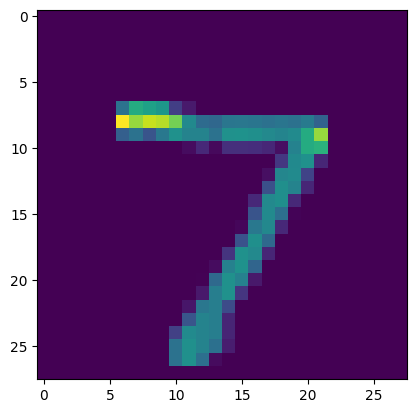

In [75]:
#so now lets check if it is true or not
plt.imshow(x_test[0])

In [76]:
#another random example
print (np.argmax(predictions[335]))

3


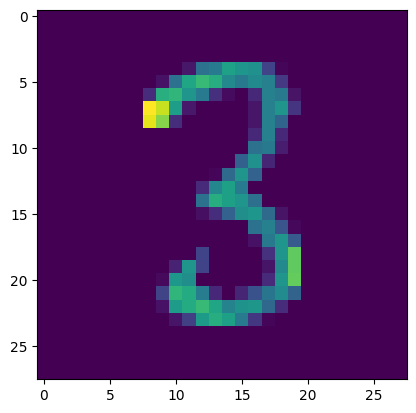

In [77]:
plt.imshow(x_test[335])

In [78]:
import pickle as pkl
print('done')

done


In [79]:
pkl.dump(model,open('model.pkl','wb'))

In [80]:
model.save('my_model')

## **-Now,lets do some predictions based on our trained CNN model with some new data;**

In [81]:
#to import my own handwritten digit image:
import cv2

In [82]:
img = cv2.imread('/content/nine.png')

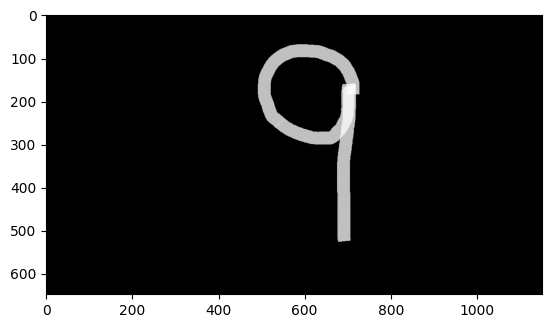

In [83]:
plt.imshow(img)

In [84]:
img.shape

(648, 1152, 3)

In [85]:
# Resize the image to 28*28 pixels
resized_image = cv2.resize(img, (28, 28))

In [86]:
resized_image.shape

(28, 28, 3)

In [87]:
# Convert the resized image to grayscale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

In [88]:
gray_image.shape

(28, 28)

In [89]:
# Normalize pixel values to [0, 1]
normalized_image = gray_image / 255.0

In [90]:
# Reshape the image to 28x28x1
new_img = np.reshape(normalized_image, (28, 28, 1))

In [91]:
new_img.shape

(28, 28, 1)

In [92]:
# Make predictions
predictions = model.predict(np.array([new_img]))

1/1 [==============================] - 0s 69ms/step


In [93]:
# Interpret predictions
predicted_class = np.argmax(predictions) ## 'predicted_classes' now contains the predicted digit labels for your new data

In [94]:
# Display the predicted digit
print(f"Predicted Digit: {predicted_class}")

Predicted Digit: 9


In [95]:
model.save('model_saved')

In [96]:
from google.colab import files
files.download('/content/model_saved')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>